# 유방암 데이터(load_breast_cancer)
- 1) feature 갯수를 10, 5, 2 로 차원 축소
- 2) 각각의 경우(30, 10, 5, 2) 분류 성능 측정
- 3) 2개로 차원축소 --> 시각화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df['target'] = cancer.target

In [4]:
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## 표준정규화

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cancer_std = scaler.fit_transform(cancer.data)

## PCA 변환

### 2차원으로 축소

In [7]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=2) # 2차원으로 축소

In [8]:
cancer_pca1 = pca1.fit_transform(cancer_std)
cancer_pca1[:5]

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       [ 7.1229532 , 10.27558912],
       [ 3.93530207, -1.94807157]])

### 5차원으로 축소

In [9]:
pca2 = PCA(n_components=5) # 5차원으로 축소
cancer_pca2 = pca2.fit_transform(cancer_std)
cancer_pca2[:5]

array([[ 9.19283683,  1.94858314, -1.12316579,  3.63372734, -1.19510729],
       [ 2.3878018 , -3.76817178, -0.52929288,  1.11826588,  0.62177343],
       [ 5.73389628, -1.07517379, -0.55174761,  0.91208218, -0.17708627],
       [ 7.1229532 , 10.27558913, -3.23278952,  0.15254604, -2.96087852],
       [ 3.93530207, -1.94807158,  1.38976662,  2.94064031,  0.54674718]])

### 10차원으로 축소

In [10]:
pca3 = PCA(n_components=10) # 10차원으로 축소
cancer_pca3 = pca3.fit_transform(cancer_std)
cancer_pca3[:5]

array([[ 9.19283683,  1.94858307, -1.12316616,  3.63373092, -1.19511017,
         1.41142461,  2.15936867, -0.39840676, -0.15712568, -0.87735656],
       [ 2.3878018 , -3.76817174, -0.52929269,  1.11826385,  0.62177501,
         0.02865626,  0.01335888,  0.24099094, -0.71189942,  1.1069635 ],
       [ 5.73389628, -1.0751738 , -0.55174763,  0.91208257, -0.17708572,
         0.54145148, -0.6681621 ,  0.09736557,  0.02409547,  0.45409779],
       [ 7.1229532 , 10.27558912, -3.23278961,  0.15254687, -2.96087812,
         3.0534208 ,  1.42991747,  1.05955441, -1.40539357, -1.11725186],
       [ 3.93530207, -1.94807157,  1.38976674,  2.94063938,  0.54674735,
        -1.22649444, -0.9362139 ,  0.6363783 , -0.26381457,  0.37775502]])

## 3) 2개로 차원축소 --> 시각화

In [11]:
cancer_pca_df1 = pd.DataFrame(data=cancer_pca1, columns=['PC1', 'PC2'])
cancer_pca_df1['target'] = cancer.target
cancer_pca_df1.head()

,PC1,PC2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


In [12]:
 # cancer.target_names

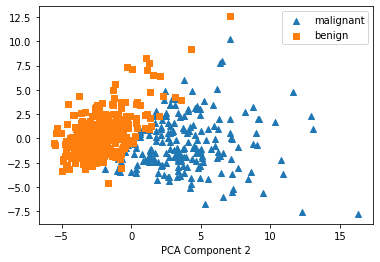

In [13]:
markers = ['^', 's']

# setosa의 target 값은 0, versicolor는 1, virginica는 2
# 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = cancer_pca_df1[cancer_pca_df1['target']==i]['PC1']
    y_axis_data = cancer_pca_df1[cancer_pca_df1['target']==i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=cancer.target_names[i])

plt.legend()
plt.xlabel('PCA Component 1')
plt.xlabel('PCA Component 2')
plt.show()

## 2) 각각의 경우(30, 10, 5, 2) 분류 성능 측정

### 차원 축소한 데이터로 분류

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### 2차원으로 분류 성능 측정

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca_df1[['PC1','PC2']], cancer.target, stratify=cancer.target, 
    test_size=0.3, random_state=2021
)

In [16]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
acc_2 = accuracy_score(y_test, pred)
print(f'2차원분류 성능 측정 :{acc_2:.4f}')

2차원분류 성능 측정 :0.9240


#### 5차원으로 분류 성능 측정

In [17]:
cancer_pca_df2 = pd.DataFrame(data=cancer_pca2, columns=['PC1', 'PC2', 'PC3','PC4', 'PC5'])
cancer_pca_df2['target'] = cancer.target
cancer_pca_df2.head()

,PC1,PC2,PC3,PC4,PC5,target
0,9.192837,1.948583,-1.123166,3.633727,-1.195107,0
1,2.387802,-3.768172,-0.529293,1.118266,0.621773,0
2,5.733896,-1.075174,-0.551748,0.912082,-0.177086,0
3,7.122953,10.275589,-3.232790,0.152546,-2.960879,0
4,3.935302,-1.948072,1.389767,2.940640,0.546747,0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca_df2[['PC1', 'PC2', 'PC3','PC4', 'PC5']], cancer.target, stratify=cancer.target, 
    test_size=0.3, random_state=2021
)

In [19]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
acc_5 = accuracy_score(y_test, pred)
print(f'5차원분류 성능 측정 :{acc_5:.4f}')

5차원분류 성능 측정 :0.9298


### 10차원으로 분류 성능 측정

In [20]:
cancer_pca_df3 = pd.DataFrame(data=cancer_pca3, columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6','PC7','PC8','PC9','PC10'])
cancer_pca_df3['target'] = cancer.target
cancer_pca_df3.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,target
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411425,2.159369,-0.398407,-0.157126,-0.877357,0
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013359,0.240991,-0.711899,1.106963,0
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541451,-0.668162,0.097366,0.024095,0.454098,0
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053421,1.429917,1.059554,-1.405394,-1.117252,0
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226494,-0.936214,0.636378,-0.263815,0.377755,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca_df3[['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6','PC7','PC8','PC9','PC10']], cancer.target, stratify=cancer.target, 
    test_size=0.3, random_state=2021
)

In [22]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
acc_10 = accuracy_score(y_test, pred)
print(f'10차원분류 성능 측정 :{acc_10:.4f}')

10차원분류 성능 측정 :0.9591


### 차원 축소하기전 데이터로 분류(30)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, test_size=0.3, random_state=2021
)

In [24]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
acc = accuracy_score(y_test, pred) # 성능보기
print(f'성능: {acc:.4f}')

성능: 0.9357
